In [2]:
# SVM 직접 구현


import numpy as np
import cvxopt
from sklearn.datasets._samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [24]:
class SVM:
    def fit(self, X, y):
        n_samples, n_features = X.shape # 데이터 개수, 속성 개수
        K = np.zeros((n_samples, n_samples))  # H = X^T X
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = np.dot(X[i], X[j])

        H = cvxopt.matrix(np.outer(y,y) * K)
        f = cvxopt.matrix(np.ones(n_samples) * -1)  # f = -1 (1 X N)
        B = cvxopt.matrix(y, (1, n_samples)) # B = y^T
        b = cvxopt.matrix(0.0)  # b = 0
        A = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))  # -1 (NxN)
        a = cvxopt.matrix(np.zeros(n_samples))  # 0 (1xN)
        solution = cvxopt.solvers.qp(H, f, A, a, B, b)  # quadratic problem solver
        a = np.ravel(solution['x'])  # 라그랑주 승수
        sv = a > 1e-5  # 라그랑주 승수가 0보다 큰 것

        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        self.b = 0          # 절편

        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])

        self.b /= len(self.a)
        self.w = np.zeros(n_features)   # 가중치
        for n in range(len(self.a)):
            self.w += self.a[n] * self.sv_y[n] * self.sv[n]

    def project(self, X):
        return np.dot(X, self.w) + self.b

    def predict(self, X):
        return np.sign(self.project(X))



In [39]:
# Generate isotropic Gaussian blobs for clustering.
X, y = make_blobs(n_samples=250, centers=2, random_state=0, cluster_std=0.60)
y[y == 0] = -1   # 0값을 -1로 변환
y = y.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svm = SVM()
svm.fit(X_train, y_train)


ValueError: Rank(A) < p or Rank([P; A; G]) < n

AttributeError: 'SVM' object has no attribute 'w'

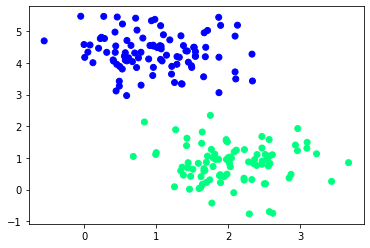

In [35]:
def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')
# w.x + b = 0
a0 = -4; a1 = f(a0, svm.w, svm.b)
b0 = 4; b1 = f(b0, svm.w, svm.b)
plt.plot([a0,b0], [a1,b1], 'k')
# w.x + b = 1
a0 = -4; a1 = f(a0, svm.w, svm.b, 1)
b0 = 4; b1 = f(b0, svm.w, svm.b, 1)
plt.plot([a0,b0], [a1,b1], 'k--')
# w.x + b = -1
a0 = -4; a1 = f(a0, svm.w, svm.b, -1)
b0 = 4; b1 = f(b0, svm.w, svm.b, -1)
plt.plot([a0,b0], [a1,b1], 'k--')

y_pred = svm.predict(X_test)
print('training\n', confusion_matrix(y_test,y_pred))
y_pred = svm.predict(X_test)
print('test\n', confusion_matrix(y_test, y_pred))

plt.title('SVM')
plt.show()